# TME sur les données blablacar

**Ce fichier est le fichier de travail**, l'autre fichier blablacar est donné pour information et pour montrer comment les données ont été collectées.

 Etudiant 1 : Thien Tai Nguyen
 Etudiant 2 : Sharane K.Murali

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pickle as pkl

## Chargement des données

Les données sont stockées au format pickle (code fourni ci-dessous):

1. Importer le module : import `pickle as pkl`
1. Charger les données avec `load`
1. La structure est un dictionnaire, les données sont dans le champ `data`
1. La description des colonnes est dans `indexcol`

In [2]:
# chargement des données
fich = pkl.load( open('donnees_blablacar.pkl', 'rb'))

# {'indexcol': cols , 'data':pp2db, 'villes': villes, 'marques':marques }
titles_col = fich['indexcol']
print(len(titles_col), titles_col)
print()
data = fich['data']
print(data)
print()
dico_villes = fich['villes']
dico_marques = fich['marques']
print(dico_marques)



print(data[2,-3])

print(dico_marques.values())

14 ['annee', 'mois', 'jour', 'heure', 'dep_ville', 'arr_ville', 'dep_coord_x', 'dep_coord_y', 'arr_coord_x', 'arr_coord_y', 'prix', 'marque', 'stars_confort', 'distance']

[[ 2.019e+03  9.000e+00  1.700e+01 ...  3.700e+01  2.000e+00  1.360e+02]
 [ 2.019e+03  9.000e+00  1.700e+01 ...  4.300e+01 -1.000e+00  2.080e+02]
 [ 2.019e+03  9.000e+00  1.700e+01 ...  3.500e+01  2.000e+00  6.100e+01]
 ...
 [ 2.019e+03  9.000e+00  1.900e+01 ...  4.300e+01 -1.000e+00  5.700e+01]
 [ 2.019e+03  9.000e+00  1.900e+01 ...  3.000e+00  2.000e+00  2.050e+02]
 [ 2.019e+03  9.000e+00  1.900e+01 ...  2.300e+01  2.000e+00  1.930e+02]]

{'FORD': 6, 'BMW': 12, 'ISUZU': 32, 'OPEL': 1, 'LAND ROVER': 28, 'LIDER': 33, 'DS': 2, 'AUDI': 49, 'DACIA': 45, 'JAGUAR': 39, 'TOYOTA': 13, 'SUZUKI': 20, 'HUNDAI': 42, 'CITROEN': 17, 'IVECO': 8, 'RENAULT': 15, 'SKODA': 27, 'ROVER': 19, 'MITSUBISHI': 5, 'MERCEDES-BENZ': 35, 'DODGE': 29, 'ALFA ROMEO': 37, 'CHEVROLET': 26, 'LANCIA': 10, 'INFINITI': 36, 'DAEWOO': 30, 'MIETWAGEN': 38, 

## Discrétisation et histogramme

Nous nous intéressons à la variable `distance` (dernière colonne). Nous allons procéder de la manière suivante:
1. Analyse rapide de la variable aléatoire: calcul de la moyenne et de l'écart-type
1. Analyse plus fine (1): affichage des 10 quantiles
1. Analyse plus fine (2): discrétisation de la variable en 10 intervalles de largeur constante & comptage des effectifs dans chaque catégorie (= construction d'un histogramme)
 - Construire l'histogramme à la main. (1) calculer les bornes des intervalles puis (2) utiliser `np.where` pour déterminer les effectifs dans chaque classe. Utiliser `plt.bar` pour l'affichage.
 - Vérifier vos résultats avec `np.histogram` et `plt.hist` pour l'affichage
 - Comparer les quantiles et les bornes des intervalles discrets
1. Discuter le nombre d'intervalles pour l'histogramme et trouver une valeur satisfaisante

**Notes** : 
- dans `np.where`, il faut mettre des parenthèses s'il y a plusieurs clause

> `np.where((x>a) & (x<b))` : tous les indices de x qui satisfont la clause
>
> `np.where((x>a) & (x<b), 1, 0).sum()` : le comptage associé

- Dans `plt.bar`, il faut donner une largeur importante aux bar, sinon on ne voit rien

In [3]:
# Analyse rapide : moyenne, écart-type, calcul des quantiles pour faire la synthèse de cette variable aléatoire

d = data[:,-1] # extraction de la variable distance

# A vous de jouer pour calculer tous les descripteurs = recherche dans la doc numpy !

#Calcul de la moyenne
moyenne = np.mean(d)

#Affichage de la moyenne
print("La moyenne vaut ",moyenne)

#Calcul de l'écart-type
et = np.std(d)

#Affichage de l'écart-type
print("L'écart-type vaut ",et)

#Calcul des quantiles
qlist = [np.quantile(d,(i+1)/10) for i in range(10) ]

#Affichage des quantiles
for i in range(10):
    print("Quantile  n°",i+1," = ",qlist[i])
    



La moyenne vaut  254.74066583696327
L'écart-type vaut  210.07021031617558
Quantile  n° 1  =  64.0
Quantile  n° 2  =  88.0
Quantile  n° 3  =  111.0
Quantile  n° 4  =  142.0
Quantile  n° 5  =  182.0
Quantile  n° 6  =  230.0
Quantile  n° 7  =  316.0
Quantile  n° 8  =  408.60000000000036
Quantile  n° 9  =  552.0
Quantile  n° 10  =  2254.0


<IPython.core.display.Javascript object>


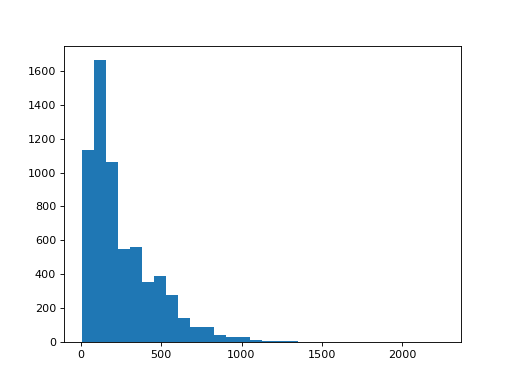

(array([1.131e+03, 1.665e+03, 1.065e+03, 5.500e+02, 5.600e+02, 3.550e+02,
        3.870e+02, 2.780e+02, 1.400e+02, 8.700e+01, 8.500e+01, 4.100e+01,
        3.100e+01, 2.600e+01, 8.000e+00, 7.000e+00, 4.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   6.        ,   80.93333333,  155.86666667,  230.8       ,
         305.73333333,  380.66666667,  455.6       ,  530.53333333,
         605.46666667,  680.4       ,  755.33333333,  830.26666667,
         905.2       ,  980.13333333, 1055.06666667, 1130.        ,
        1204.93333333, 1279.86666667, 1354.8       , 1429.73333333,
        1504.66666667, 1579.6       , 1654.53333333, 1729.46666667,
        1804.4       , 1879.33333333, 1954.26666667, 2029.2       ,
        2104.13333333, 2179.06666667, 2254.        ]),
 <BarContainer object of 30 artists>)

In [4]:
# Discrétisation des distances & histogramme avec np.histogram
histo = np.histogram(d,bins=10)


plt.hist(d,30)

[1131, 1665, 1065, 550, 560, 355, 387, 278, 140, 87, 85, 41, 31, 26, 8, 7, 4, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
6.0
[   6.           80.93333333  155.86666667  230.8         305.73333333
  380.66666667  455.6         530.53333333  605.46666667  680.4
  755.33333333  830.26666667  905.2         980.13333333 1055.06666667
 1130.         1204.93333333 1279.86666667 1354.8        1429.73333333
 1504.66666667 1579.6        1654.53333333 1729.46666667 1804.4
 1879.33333333 1954.26666667 2029.2        2104.13333333 2179.06666667]


<IPython.core.display.Javascript object>


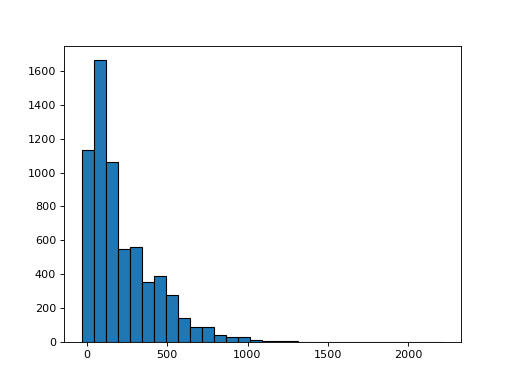

<BarContainer object of 30 artists>

In [11]:
# Discrétisation des distances & histogramme a la main
n = 30 # nb intervalle
inter = (max(d)-min(d))/n
bornes = np.arange(min(d),max(d),inter) 



#[min(d)]
#for i in range(1,n+1):
#    bornes.append(bornes[i-1]+inter)

# calcul des effectifs avec np.where

effectifs = []
for i in range(n):
    length = np.where((d>=bornes[i])&(d<bornes[i]+inter),1,0).sum()
    effectifs.append(length)

print(effectifs)
print(min(d))
# affichage avec plt.bar = histogramme à la main

print(bornes)
plt.figure()
plt.bar(bornes,effectifs,width=75,edgecolor='k')


## histogramme (bis)
Tracer l'histogramme des prix au km

<IPython.core.display.Javascript object>


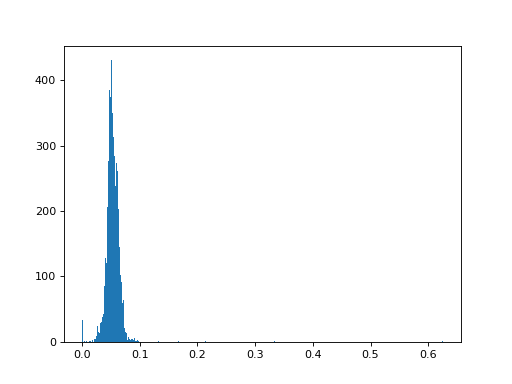

(array([ 34.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          1.,   1.,   0.,   2.,   0.,   6.,   4.,   4.,   7.,   9.,  24.,
         15.,  16.,  13.,  29.,  30.,  27.,  38.,  42.,  76.,  86., 128.,
        121., 164., 206., 276., 253., 385., 374., 431., 304., 350., 314.,
        285., 279., 239., 274., 336., 261., 203., 145., 118., 102.,  92.,
         68.,  59.,  64.,  21.,  14.,  15.,  14.,   8.,   3.,   7.,   4.,
          4.,   3.,   4.,   4.,   1.,   3.,   5.,   1.,   1.,   1.,   3.,
          1.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0., 

In [6]:
# histogramme des prix au km : construction de la variable puis utilisation de np.histogramme
p = data[:,-4]

prixkm = [p[i]/d[i] for i in range(len(p))]

plt.hist(prixkm,500)


# Distributions jointes, distributions conditionnelles

Nous voulons maintenant étudier la distribution jointe entre la distance et la marque de la voiture. Partir des distributions discrètes ou discétisées et construire le tableau d'effectif puis normaliser par les effectifs de l'échantillon pour estimer la loi jointe.

Il est diffile d'analyser cette probabilité jointe (cf ci-dessous pour l'affichage)... Nous allons donc passer à la loi conditionnelle: nous voulons donc calculer la probabilité de la distance conditionnellement à la marque de la voiture.

1. Proposer un critère rapide pour vérifier que votre distribution conditionnelle respecte bien les propriétés de base
1. Cette distribution conditionnelle fait apparaitre des pics très marqués: pouvons-nous tirer parti de ces informations?

**Note:** 
- pour afficher une matrice `p_dm`, la meilleure solution est la suivante:
> `plt.imshow(p_dm, interpolation='nearest')`
>
> `plt.show()`
- la variable `marque` est bruitée. Vous pourrez vous amuser à éliminer ou fusionner certaines catégories
- les indices dans une matrice doivent toujours être entiers. `int(...)`
- pour ajouter une description sur l'axe des x:
```python
fig, ax = plt.subplots(1,1)
plt.imshow(p_dsm, interpolation='nearest')
ax.set_xticks(np.arange(len(dico_marques)))
ax.set_xticklabels(dico_marques.keys(),rotation=90,fontsize=8)
plt.show()
```
- Si l'image est trop petite pour voir quelque chose: solution = sauvegarde en pdf (ie vectorielle) + ouverture avec un logiciel de lecture pdf
```python
plt.savefig('mafigure.pdf')
```



[ 42.  33.   0.  38.   0.   0.  10.  26.  27.   0.  40.   4.   0. 146.
   0. 221.  13.   0.   0.   2.   0.   5.   5.   1.   0.   0.   0.  87.
   0.   0.   0.  29. 122.   0.  14.   0.   0.   0.   0. 174.   8.   1.
   2.   0.   1.  11.   3.   1.   0.  22.  10.   0.  16.  17.]


<IPython.core.display.Javascript object>


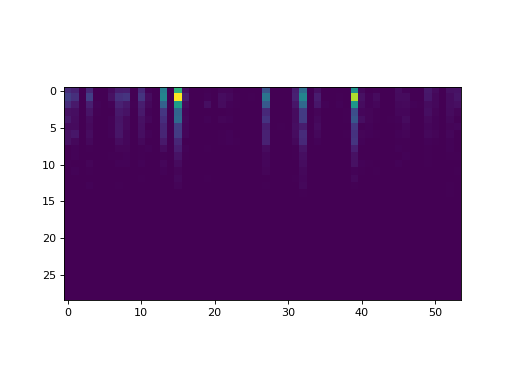

In [7]:
# loi jointe distance / marque

# construction de la distance discrétisée 
# Dimensions : = (Nind x 1) = mêmes dimensions que d
# contenu = catégorie de distance (entre 0 et 29 par exemple si on a discrétisé en 30 catégories)
dd = np.zeros(d.shape)

# remplissage avec np.where

dd = np.where(True, (d - min(d))//inter, 0)

p_dm = np.zeros((len(bornes)-1, len(dico_marques)))

# remplissage de la matrice p_dm = double boucle + comptage
for i in range(len(bornes)-1):
    case_value = np.where(dd == i)
    compteur_marque = 0
    for value in dico_marques.values():
        compteur = 0
        for f in range(len(case_value[0])):
           if (np.where((data[case_value[0][f],-3] == value),1,0)):
                compteur += 1
        p_dm[i][compteur_marque] = compteur
        compteur_marque += 1    
           
print(p_dm[0])

p_dm /= p_dm.sum() # normalisation

# affichage du résultat
plt.imshow(p_dm, interpolation='nearest')
plt.show()
 

[3.62533064e-02 2.78512525e-02 1.55593590e-04 3.15854987e-02
 1.08915513e-03 1.55593590e-04 6.84611794e-03 3.20522794e-02
 2.47393807e-02 6.22374358e-04 3.12743115e-02 6.53493076e-03
 1.55593590e-04 9.72459935e-02 6.22374358e-04 1.88735024e-01
 1.33810487e-02 3.11187179e-04 6.22374358e-04 4.82340128e-03
 1.55593590e-04 6.06814999e-03 4.35662051e-03 1.40034231e-03
 3.11187179e-04 3.11187179e-04 1.55593590e-04 8.15310409e-02
 1.55593590e-04 3.11187179e-04 1.08915513e-03 2.20942897e-02
 1.06737202e-01 1.55593590e-04 1.50925782e-02 7.77967948e-04
 3.11187179e-04 1.08915513e-03 1.40034231e-03 1.65551579e-01
 1.10471449e-02 4.35662051e-03 4.35662051e-03 4.66780769e-04
 7.77967948e-04 8.24646025e-03 9.02442819e-03 6.22374358e-04
 7.77967948e-04 1.58705461e-02 6.84611794e-03 1.55593590e-04
 1.26030808e-02 1.07359577e-02]
0.9999999999999998
[0.00653493 0.00513459 0.         0.00591256 0.         0.
 0.00155594 0.00404543 0.00420103 0.         0.00622374 0.00062237
 0.         0.02271666 0.     

<IPython.core.display.Javascript object>


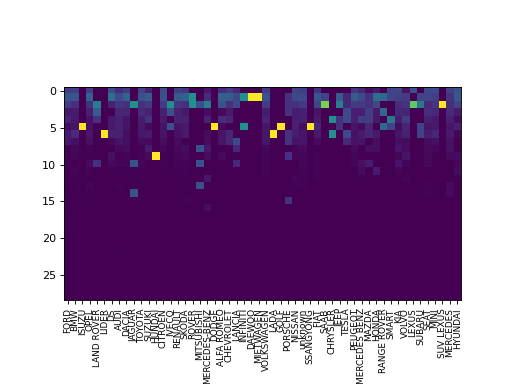

[1.75976350e-01 2.59063327e-01 1.65707173e-01 8.55764742e-02
 8.71324101e-02 5.52357243e-02 6.02147192e-02 4.32550179e-02
 2.17831025e-02 1.35366423e-02 1.32254551e-02 6.37933717e-03
 4.82340128e-03 4.04543333e-03 1.24474872e-03 1.08915513e-03
 6.22374358e-04 3.11187179e-04 1.55593590e-04 0.00000000e+00
 1.55593590e-04 1.55593590e-04 1.55593590e-04 1.55593590e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
1.0
[0.00653493 0.00513459 0.         0.00591256 0.         0.
 0.00155594 0.00404543 0.00420103 0.         0.00622374 0.00062237
 0.         0.02271666 0.         0.03438618 0.00202272 0.
 0.         0.00031119 0.         0.00077797 0.00077797 0.00015559
 0.         0.         0.         0.01353664 0.         0.
 0.         0.00451221 0.01898242 0.         0.00217831 0.
 0.         0.         0.         0.02707328 0.00124475 0.00015559
 0.00031119 0.         0.00015559 0.00171153 0.00046678 0.00015559
 0.         0.00342306 0.00155594 0.         0.0

/tmp/ipykernel_7963/1259047323.py:55: RuntimeWarning: invalid value encountered in true_divide
  p_dsm[j,:] = p_dm[j,:] / p_m[j]


In [8]:
# loi conditionnelle distance | marque
# calcul d'une marginale

p_m = np.zeros(len(dico_marques))

for i in range(len(p_m)):
    p_m[i] = p_dm[:,i].sum()

#Vérification
print(p_m)
print(p_m.sum())
# note : si ça ne somme pas exactement à 1 c'est juste le résultat du calcul python. lLa formule est juste.


# calcul de la conditionnelle
p_dsm = np.zeros((len(bornes)-1, len(dico_marques)))

# application du Théorème de Bayes : P(A|B) = P(A,B) / P(B)
for j in range(len(p_m)):
        p_dsm[:,j] = p_dm[:,j] / p_m[j]
 
#Vérification
print(p_dm[0])
print(p_dsm[0])
print(p_dsm[:,0].sum())

# affichage
fig, ax = plt.subplots(1,1)
plt.imshow(p_dsm, interpolation='nearest')
ax.set_xticks(np.arange(len(dico_marques)))
ax.set_xticklabels(dico_marques.keys(),rotation=90,fontsize=8)
plt.show()

# proposition d'un critère très rapide pour vérifier qu'il s'agit bien d'une distribution conditionnelle

# Si toutes les lignes sont égales à 1, alors nous faisons face à une distribution conditionnelle
# print(p_dsm[1,:].sum()) ne somme à 1 donc notre résultat est bon

# Test dans l'autre sens   
p_m = np.zeros(len(bornes)-1)

for i in range(len(p_m)):
    p_m[i] = p_dm[i,:].sum()
    
print(p_m)
print(p_m.sum())


# calcul de la conditionnelle
p_dsm = np.zeros((len(bornes)-1, len(dico_marques)))

# application du Théorème de Bayes : P(A|B) = P(A,B) / P(B)
# p_dsm correspond 
for j in range(len(p_m)):
        p_dsm[j,:] = p_dm[j,:] / p_m[j]
  
print(p_dm[0])
print(p_dsm[0])
print(p_dsm[0].sum())


## Tracé de l'ensemble de l'échantillon avec des codes couleurs

Nous proposons ensuite de tracer toutes les trajectoires des voitures blablacar. Pour cela, il faut utiliser la commande `plt.plot`.
Vous devez optenir des étoiles à partir des 7 villes requêtes: `['Paris', 'Marseille', 'Grenoble', 'Lille', 'Strasbourg', 'Nantes', 'Bordeaux']`.
Mais on ne voit pas grand chose... Et ça prend beaucoup de temps à tracer avec une boucle for. On propose donc une série d'exercice pour mieux comprendre ce qui se passe.
1. Attention à l'ordre des arguments dans le plot:
```plt.plot(tous_les_x, tous_les_y)```
Afin de tracer des trajectoires, il faut envoyer les x et les y 2 par 2 dans une boucle `for`
1. Pour éviter les boucles, il existe une méthode `quiver` dédiée au tracé de champs de vecteurs: ça ira beaucoup plus vite qu'avec plot. Il faut juste bien comprendre les mécanismes d'échelles. Pour utiliser l'échelle 1, la commande est la suivante:
```python
plt.quiver(x_dep, y_dep, delta_x, delta_y,\
            angles='xy', scale_units='xy', scale=1)
```
1. Isoler les trajets proposés à partir de chacune des villes sachant les coordonnées sont:
```python
coord = np.array([[45.18721767,  5.72345183],
 [47.22572172, -1.56558993],
 [50.63010695,  3.07071992],
 [48.5782548,   7.74078742],
 [44.83848889, -0.58156509],
 [43.2991509,   5.38925024],
 [48.8477201,   2.34607889]])
```
Chaque trajectoire (point de départ) sera rattachée à la ville la plus proche.
Une fois la distance calculée pour chaque origine de trajectoire, vous pourrez avoir besoin de `argmin`
1. Tracer les trajets d'une couleur spéciale en fonction des origines. 

Les commandes matplotlib attendent des instructions de couleur au format RGB ou avec des lettres. Je vous propose une solution élégante pour distinguer les villes.
 - soit l'index de la ville la plus proche sotcké dans `ville_or` (0,...,7)
 - construire le dictionnaire: `dict({0:'b', 1:'r', 2:'k', 3:'y', 4:'c', 5:'m', 6:'g'})`
 - transformer `ville_or` en `ville_c` en vectorisant l'appel à la table de hash:
```python
ville_c = np.vectorize(dico.get)(ville_or)
```

In [ ]:
# tracé de l'ensemble des trajectoires avec un code couleur en fonction de la ville de départ




In [12]:
# trouver l'information sur la ville la plus proche

coord = np.array([[45.18721767,  5.72345183],
 [47.22572172, -1.56558993],
 [50.63010695,  3.07071992],
 [48.5782548,   7.74078742],
 [44.83848889, -0.58156509],
 [43.2991509,   5.38925024],
 [48.8477201,   2.34607889]])

# calcul de la matrice de distance
dist =               
# indice de la ville d'origine du trajet (plus petite distance dans le tableau ci-dessus)
ville_or = 

# astuce pour construire une correspondance indice => code couleur
dico = dict({0:'b', 1:'r', 2:'k', 3:'y', 4:'c', 5:'m', 6:'g'})
ville_c = np.vectorize(dico.get)(ville_or)

plt.figure()
plt.quiver([... coordonnées des vecteurs ...]\
           color= ville_c,  angles='xy', scale_units='xy', scale=1)
plt.show()

SyntaxError: invalid syntax (3609566451.py, line 12)

## Etude de la corrélation entre variables

On propose d'étudier la corrélation entre la distance du trajet et le nombre d'étoiles de confort. Attention, les étoiles ne sont pas toujours renseignées (-1 = inconnu). On fera aussi ces opérations entre la distance et le prix.

1. Tracer dans le plan les coordonnées (distance,etoile) pour les points concernés

Vous utiliserez la commande `scatter` pour réaliser l'opération
1. Calculer le coefficient de corrélation entre les deux variables aléatoires


In [ ]:
# test de corrélation entre la distance et le confort de la voiture
plt.figure()
# affichage du nuage de points correspondant au deux variables
plt.show()

# calcul du coefficient de corrélation pour tous les points admissibles 
# (ceux pour lesquels les étoiles sont renseignées)

# test de corrélation entre la distance et le prix
plt.figure()
# affichage du nuage de points correspondant au deux variables
plt.show()

# calcul du coefficient de corrélation pour tous les points admissibles 



## Quelques questions supplémentaires

### prix au kilomètre en fonction de l'origine
On s'intérroge sur le prix des courses en fonction des villes de départ. On ne veut pas tomber dans des pièges liés à des résumés simplistes, nous allons donc calculer la distribution jointe (prix_km, ville_origine).
1. Mettre au propre le code de discretisation en construisant une méthode de signature:
```python
def discretisation(x, nintervalles):
    #[...]
    return bornes, effectifs, xd 
```
1. Mettre au propre le code de calcul de la loi jointe entre deux échantillons de variables aléatoires discrètes
```python
def pjointe(xd, yd):
    #[...]
    return pj
```
1. En l'état, nous avons du mal à analyser les données. Ceci est du aux valeurs extrêmes (notamment hautes). Afin de rendre l'analyse robuste, seuiller le prix au km au 99ème percentile (toutes les valeurs supérieures sont ramenées à cette valeur limite).
1. Proposer quelques analyses.

### même analyse pour voir dans quelle ville les gens sont plus matinaux, s'ils partent plus vers le sud ou le nord, l'est ou l'ouest...

Si vous étiez un journaliste en manque de sujet de reportage, quel(s) graphique(s) calculeriez vous à partir de ces données? 


In [ ]:
def discretisation(x, nintervalles, eps = 0.0000001) :
    # [...]
    return bornes, effectifs, xd

def pjointe(xd, yd): # variable codées de 0 à valmax
    # [...]
    return pj

In [ ]:
# prix km
pkm = data[:,-4]/data[:,-1]
n = 30 # nb catégories

# robustesse : calcul du 99è percentile et seuillage des valeurs

bornes, effectifs, pkmd = discretisation(pkm, n)

pj = pjointe(pkmd,ville_or)

pv =       # calcul de la marginale
p_km_s_v = # calcul de la conditionnelle

fig, ax = plt.subplots(1,1)
plt.imshow(p_km_s_v, interpolation='nearest')
plt.show()

# analyses